Crea i singoli file json che vengono poi letti da Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [6]:
from EEG_utils.EEG_utils_Siena import *

In [7]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\siena-scalp-eeg\\1.0.0\\"

# observations = ["PN07-1"]

patient_id = "PN00"
record_id = "2"

num_points = 300

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\siena-scalp-eeg\1.0.0\PN00\PN00-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())
c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils_Siena.py:157: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


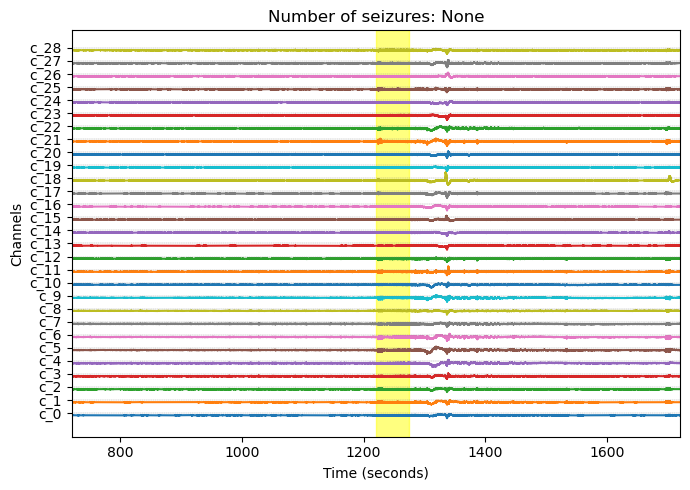

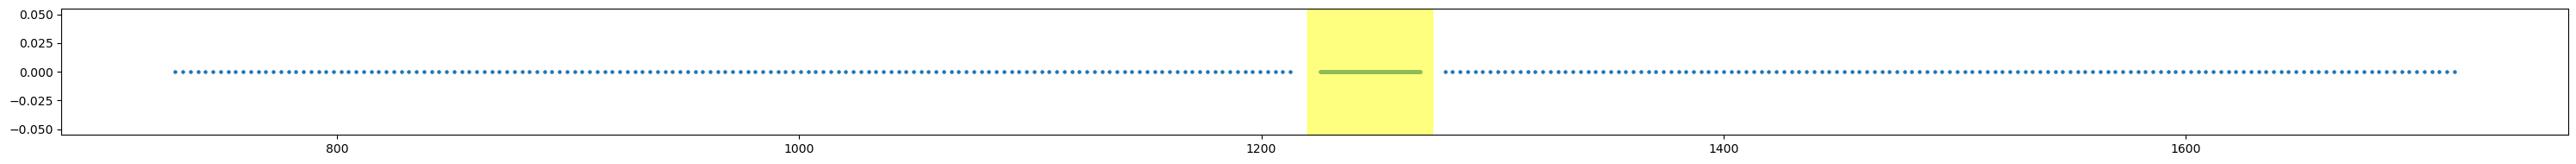

Creating graphs...
k: 5120 ---> t: 730.0 (seizure class: 0)
k: 6789 ---> t: 733.259765625 (seizure class: 0)
k: 8458 ---> t: 736.51953125 (seizure class: 0)
k: 10127 ---> t: 739.779296875 (seizure class: 0)
k: 11796 ---> t: 743.0390625 (seizure class: 0)
k: 13465 ---> t: 746.298828125 (seizure class: 0)
k: 15134 ---> t: 749.55859375 (seizure class: 0)
k: 16803 ---> t: 752.818359375 (seizure class: 0)
k: 18472 ---> t: 756.078125 (seizure class: 0)
k: 20141 ---> t: 759.337890625 (seizure class: 0)
k: 21810 ---> t: 762.59765625 (seizure class: 0)
k: 23479 ---> t: 765.857421875 (seizure class: 0)
k: 25148 ---> t: 769.1171875 (seizure class: 0)
k: 26817 ---> t: 772.376953125 (seizure class: 0)
k: 28486 ---> t: 775.63671875 (seizure class: 0)
k: 30155 ---> t: 778.896484375 (seizure class: 0)
k: 31824 ---> t: 782.15625 (seizure class: 0)
k: 33493 ---> t: 785.416015625 (seizure class: 0)
k: 35162 ---> t: 788.67578125 (seizure class: 0)
k: 36831 ---> t: 791.935546875 (seizure class: 0)
k: 38500

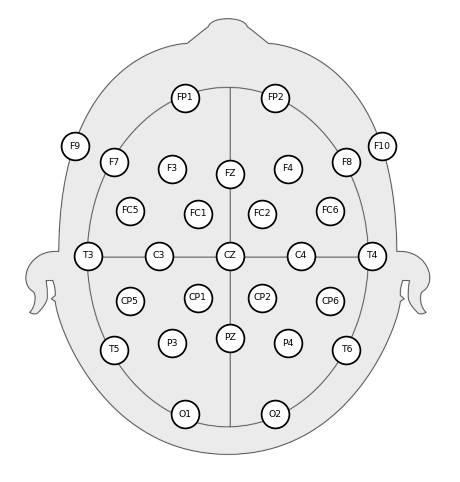

In [8]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=3)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [9]:
import datetime

now = datetime.datetime.now()
print("Ultima esecuzione completa:", now.strftime("%d/%m/%Y, ore %H:%M"))

Ultima esecuzione completa: 24/03/2025, ore 15:07


In [10]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)